In [46]:
# standard libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# import operator for dictionary sorting operations
import operator

pd.set_option('display.max_columns', None)


data = pd.read_csv('../data/L1/ames_house_price_cleaned.csv', na_filter=False)
print(data.shape)
data.head()

data.drop(['pid'], axis = 1, inplace=True)


# Force categorical variables that are 'numeric' to be categorical
data["ms_sub_class"] = data['ms_sub_class'].astype('category')
data["overall_qual"] = data['overall_qual'].astype('category')
data["overall_cond"] = data['overall_cond'].astype('category')


# Convert non-numeric columns to category
non_numeric_columns = data.select_dtypes(exclude=['number']).columns
data[non_numeric_columns] = data[non_numeric_columns].astype('category')

# Select numeric columns
feat_num = data.select_dtypes(include=['number'])

# Select categorical columns
feat_cat = data.select_dtypes(include=['category'])

feat_cat['sale_price'] = feat_num['sale_price']


(2578, 81)


In [47]:
print(data.info())
test = data.isna().sum()
test = test[test>0]
print('The number of missing values for all features which contain missing values (nan)')
print(test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2578 entries, 0 to 2577
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   gr_liv_area      2578 non-null   int64   
 1   sale_price       2578 non-null   int64   
 2   ms_sub_class     2578 non-null   category
 3   ms_zoning        2578 non-null   category
 4   lot_frontage     2578 non-null   float64 
 5   lot_area         2578 non-null   int64   
 6   street           2578 non-null   category
 7   alley            2578 non-null   category
 8   lot_shape        2578 non-null   category
 9   land_contour     2578 non-null   category
 10  utilities        2578 non-null   category
 11  lot_config       2578 non-null   category
 12  land_slope       2578 non-null   category
 13  neighborhood     2578 non-null   category
 14  condition1       2578 non-null   category
 15  condition2       2578 non-null   category
 16  bldg_type        2578 non-null   category


In [48]:
feat_cat.head()

,ms_sub_class,ms_zoning,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition1,condition2,bldg_type,house_style,overall_qual,overall_cond,roof_style,roof_matl,exterior1st,exterior2nd,mas_vnr_type,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmt_fin_type1,bsmt_fin_type2,heating,heating_qc,central_air,electrical,kitchen_qual,functional,fireplace_qu,garage_type,garage_finish,garage_qual,garage_cond,paved_drive,pool_qc,fence,misc_feature,sale_type,sale_condition,sale_price
0,30,RL,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,Gable,CompShg,Wd Sdng,Wd Sdng,None,TA,TA,CBlock,TA,TA,No,Rec,Unf,GasA,TA,Y,SBrkr,TA,Typ,Gd,Detchd,Unf,TA,TA,Y,NA,NA,NA,WD,Normal,126000
1,120,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,Gable,CompShg,HdBoard,HdBoard,BrkFace,Gd,TA,CBlock,Gd,TA,Mn,GLQ,ALQ,GasA,TA,Y,SBrkr,Gd,Typ,NA,Attchd,Fin,TA,TA,Y,NA,NA,NA,WD,Normal,139500
2,30,C (all),Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,Hip,CompShg,MetalSd,MetalSd,None,Gd,TA,BrkTil,TA,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NA,Detchd,Unf,TA,Po,N,NA,NA,NA,WD,Normal,124900
3,70,RL,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,Gable,CompShg,MetalSd,MetalSd,None,Gd,Gd,BrkTil,Fa,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,NA,Detchd,Unf,TA,TA,N,NA,NA,NA,WD,Normal,114000
4,60,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NA,Attchd,Fin,TA,TA,Y,NA,NA,NA,WD,Normal,227000


In [49]:
feat_num.head()

,gr_liv_area,sale_price,lot_frontage,lot_area,year_built,year_remod_add,mas_vnr_area,bsmt_fin_sf1,bsmt_fin_sf2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abv_gr,kitchen_abv_gr,tot_rms_abv_grd,fireplaces,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3_ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,log_sale_price
0,856,126000,80.0,7890,1939,1950,0.0,238.0,0.0,618.0,856.0,856,0,0,1.0,0.0,1,0,2,1,4,1,2.0,399.0,0,0,0,0,166,0,0,3,2010,11.744037
1,1049,139500,42.0,4235,1984,1984,149.0,552.0,393.0,104.0,1049.0,1049,0,0,1.0,0.0,2,0,2,1,5,0,1.0,266.0,0,105,0,0,0,0,0,2,2009,11.845820
2,1001,124900,60.0,6060,1930,2007,0.0,737.0,0.0,100.0,837.0,1001,0,0,0.0,0.0,1,0,2,1,5,0,1.0,216.0,154,0,42,86,0,0,0,11,2007,11.735269
3,1039,114000,80.0,8146,1900,2003,0.0,0.0,0.0,405.0,405.0,717,322,0,0.0,0.0,1,0,2,1,6,0,1.0,281.0,0,0,168,0,111,0,0,5,2009,11.643954
4,1665,227000,70.0,8400,2001,2001,0.0,643.0,0.0,167.0,810.0,810,855,0,1.0,0.0,2,1,3,1,6,0,2.0,528.0,0,45,0,0,0,0,0,11,2009,12.332705


In [50]:
corr_matrix = feat_num.drop(['log_sale_price'], axis = 1).corr()
print(corr_matrix)



                 gr_liv_area  sale_price  lot_frontage  lot_area  year_built  \
gr_liv_area         1.000000    0.725780      0.299526  0.253716    0.227472   
sale_price          0.725780    1.000000      0.328093  0.275026    0.544688   
lot_frontage        0.299526    0.328093      1.000000  0.315734    0.080407   
lot_area            0.253716    0.275026      0.315734  1.000000    0.010776   
year_built          0.227472    0.544688      0.080407  0.010776    1.000000   
year_remod_add      0.306139    0.514820      0.052925  0.008811    0.571799   
mas_vnr_area        0.380680    0.499769      0.176638  0.098712    0.301420   
bsmt_fin_sf1        0.156373    0.462518      0.146026  0.158516    0.303175   
bsmt_fin_sf2       -0.020248    0.022705      0.039534  0.083088   -0.009688   
bsmt_unf_sf         0.246177    0.168111      0.101322  0.018958    0.091990   
total_bsmt_sf       0.403053    0.655575      0.269718  0.216757    0.400879   
1st_flr_sf          0.533057    0.645971

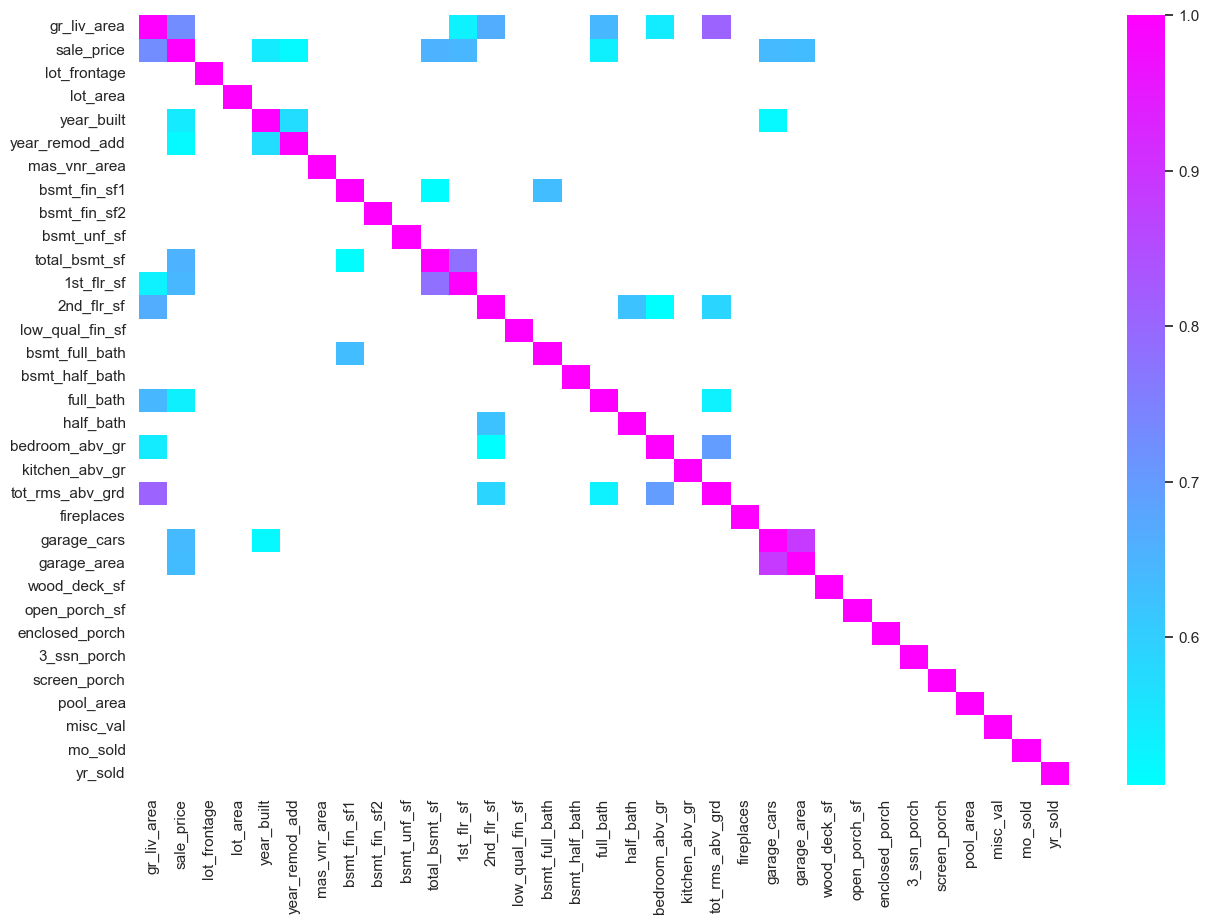

In [51]:

# Select correlations greater than 0.5
high_corr_mat = corr_matrix[abs(corr_matrix) >= 0.5]
# Plot correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(high_corr_mat,
            annot=False,
            #fmt='.1f',
            cmap='cool',
           linewidth = 0,
           linecolor = 'white')
plt.savefig("../figs/continuous_feat_clustered_corr_matrix_highcorr.png", bbox_inches='tight') 

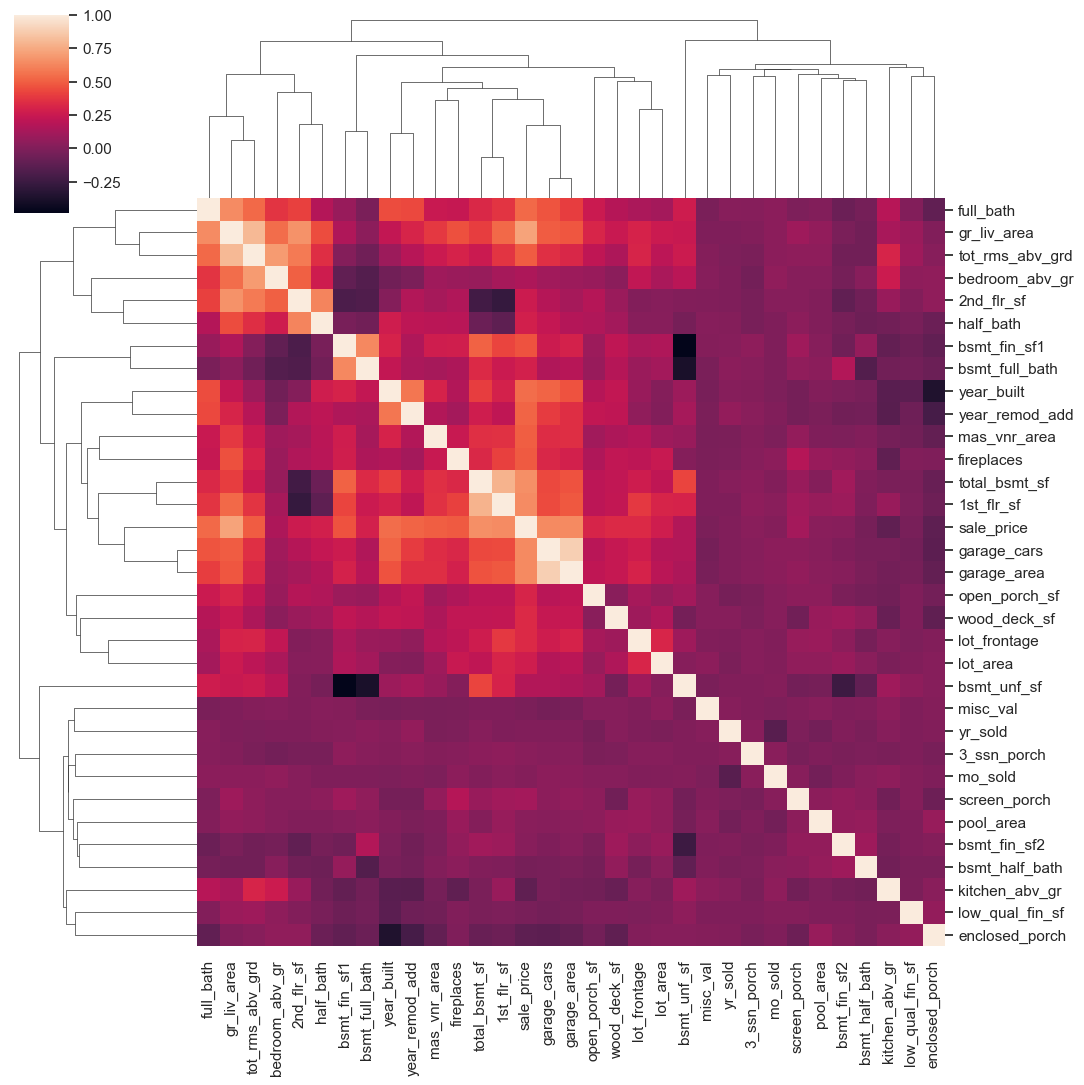

In [52]:



fig = sns.clustermap(corr_matrix, figsize=(11,11))
fig.savefig("../figs/continuous_feat_clustered_corr_matrix.png", bbox_inches='tight') 

## CLUSTER CORR

In [53]:
import scipy
import scipy.cluster.hierarchy as sch

def cluster_corr(corr_array, inplace=False):
    """
    Rearranges the correlation matrix, corr_array, so that groups of highly 
    correlated variables are next to eachother 
    
    Parameters
    ----------
    corr_array : pandas.DataFrame or numpy.ndarray
        a NxN correlation matrix 
        
    Returns
    -------
    pandas.DataFrame or numpy.ndarray
        a NxN correlation matrix with the columns and rows rearranged
    """
    pairwise_distances = sch.distance.pdist(corr_array)
    linkage = sch.linkage(pairwise_distances, method='complete')
    cluster_distance_threshold = pairwise_distances.max()/2
    idx_to_cluster_array = sch.fcluster(linkage, cluster_distance_threshold, 
                                        criterion='distance')
    idx = np.argsort(idx_to_cluster_array)
    
    if not inplace:
        corr_array = corr_array.copy()
    
    if isinstance(corr_array, pd.DataFrame):
        return corr_array.iloc[idx, :].T.iloc[idx, :]
    return corr_array[idx, :][:, idx]

<Axes: >

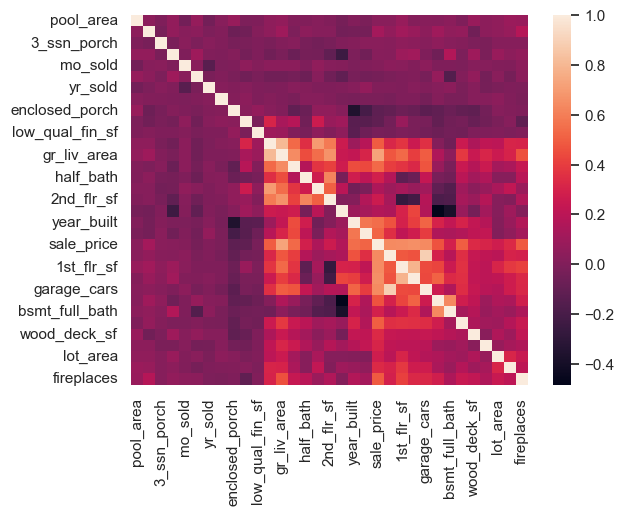

In [54]:
sns.heatmap(cluster_corr(corr_matrix))


Correlation:  0.7257797192722182


<Figure size 600x600 with 0 Axes>

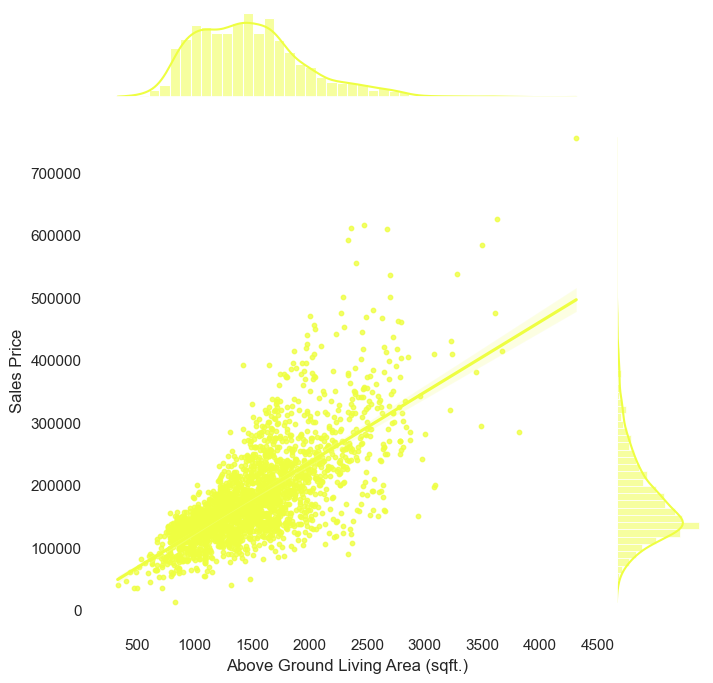

In [55]:
import seaborn as sns
sns.set(rc={'axes.facecolor':(0,0,0,0), 'figure.facecolor':(0,0,0,0)})

def plotCorrelation(variables, data, filename, xlab = 'Above Ground Living Area (sqft.)', ylab = 'Log Sales Price'):
    """
    1. Print correlation of two variables
    2. Create jointplot of two variables
    """
    # Print correlation
    print("Correlation: ", data[[variables[0],
                                       variables[1]]].corr().iloc[1, 0])

    # Create jointplot
    plt.figure(figsize=(6, 6))
    
    ax = sns.jointplot(x = data[(variables[0])],
                  y = data[(variables[1])],
                  kind='reg',
                  height=7,
                  scatter_kws={'s': 10},
                  marginal_kws={'kde': True},
                  color = '#EEFE41')
    
    
    plt.xlabel(xlab)
    plt.ylabel(ylab)

    
    plt.savefig(filename, bbox_inches='tight') 


plotCorrelation(['gr_liv_area', 'sale_price'], feat_num, "../figs/corr_scatterplot_grlivarea_saleprice.png", ylab = 'Sales Price')




Correlation:  0.7229616620964562


<Figure size 600x600 with 0 Axes>

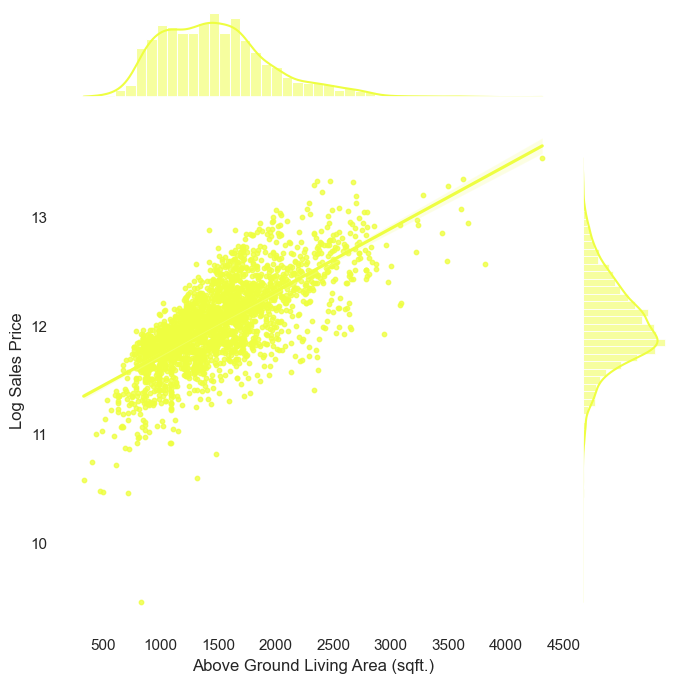

In [56]:
plotCorrelation(['gr_liv_area', 'log_sale_price'], data, "../figs/corr_scatterplot_grlivarea_logsaleprice.png")

In [57]:
#plotCorrelation(['overall_qual', 'log_sale_price'], data, "../figs/corr_scatterplot_overallqual_logsaleprice.png", xlab = "Overall Quality")

/var/folders/0p/rh9j3dm51wn8w8hpwmkfvqkw0000gn/T/ipykernel_56448/2347769378.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  variables[1]]].corr().iloc[1, 0])


IndexError: index 1 is out of bounds for axis 0 with size 1

# PLOT CATEGORICAL FEATURES - Barplots

In [62]:
non_numeric_columns

Index(['ms_sub_class', 'ms_zoning', 'street', 'alley', 'lot_shape',
       'land_contour', 'utilities', 'lot_config', 'land_slope', 'neighborhood',
       'condition1', 'condition2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'roof_style', 'roof_matl', 'exterior1st', 'exterior2nd',
       'mas_vnr_type', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmt_fin_type1', 'bsmt_fin_type2',
       'heating', 'heating_qc', 'central_air', 'electrical', 'kitchen_qual',
       'functional', 'fireplace_qu', 'garage_type', 'garage_finish',
       'garage_qual', 'garage_cond', 'paved_drive', 'pool_qc', 'fence',
       'misc_feature', 'sale_type', 'sale_condition'],
      dtype='object')

In [81]:
feat_cat.head()

,ms_sub_class,ms_zoning,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition1,condition2,bldg_type,house_style,overall_qual,overall_cond,roof_style,roof_matl,exterior1st,exterior2nd,mas_vnr_type,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmt_fin_type1,bsmt_fin_type2,heating,heating_qc,central_air,electrical,kitchen_qual,functional,fireplace_qu,garage_type,garage_finish,garage_qual,garage_cond,paved_drive,pool_qc,fence,misc_feature,sale_type,sale_condition,sale_price
0,30,RL,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,Gable,CompShg,Wd Sdng,Wd Sdng,None,TA,TA,CBlock,TA,TA,No,Rec,Unf,GasA,TA,Y,SBrkr,TA,Typ,Gd,Detchd,Unf,TA,TA,Y,NA,NA,NA,WD,Normal,126000
1,120,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,Gable,CompShg,HdBoard,HdBoard,BrkFace,Gd,TA,CBlock,Gd,TA,Mn,GLQ,ALQ,GasA,TA,Y,SBrkr,Gd,Typ,NA,Attchd,Fin,TA,TA,Y,NA,NA,NA,WD,Normal,139500
2,30,C (all),Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,Hip,CompShg,MetalSd,MetalSd,None,Gd,TA,BrkTil,TA,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NA,Detchd,Unf,TA,Po,N,NA,NA,NA,WD,Normal,124900
3,70,RL,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,Gable,CompShg,MetalSd,MetalSd,None,Gd,Gd,BrkTil,Fa,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,NA,Detchd,Unf,TA,TA,N,NA,NA,NA,WD,Normal,114000
4,60,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NA,Attchd,Fin,TA,TA,Y,NA,NA,NA,WD,Normal,227000


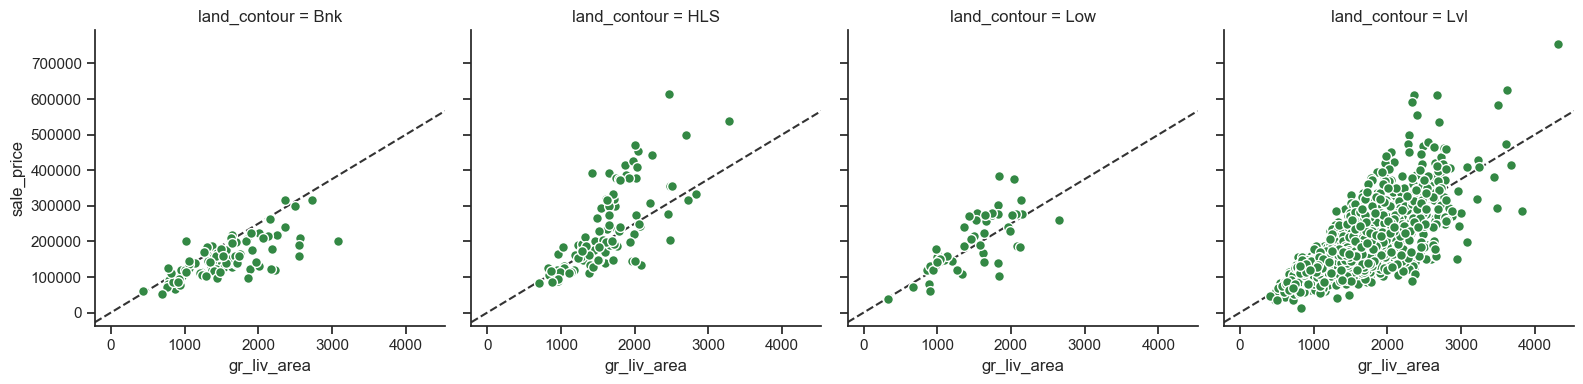

In [84]:
g = sns.FacetGrid(data, col="land_contour", margin_titles=True, height=4)
g.map(plt.scatter, "gr_liv_area", "sale_price", color="#338844", edgecolor="white", s=50, lw=1)
for ax in g.axes_dict.values():
    ax.axline((0, 0), slope=125, c=".2", ls="--", zorder=0)
#g.set(xlim=(0, 60), ylim=(0, 14))

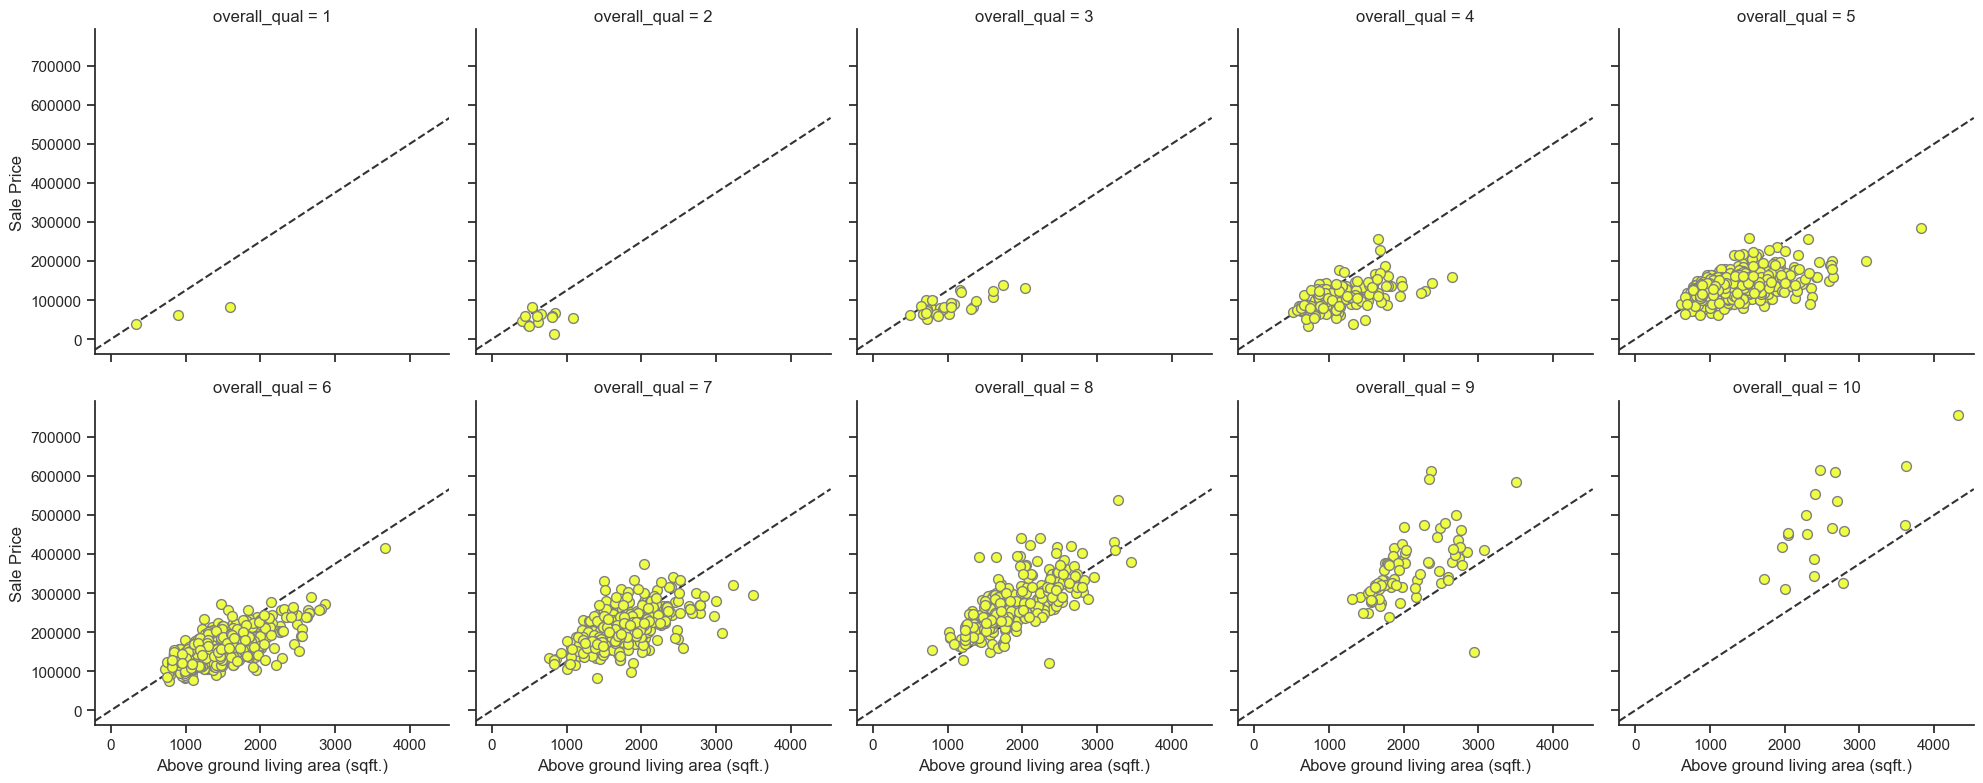

In [100]:
g = sns.FacetGrid(data, col="overall_qual", margin_titles=True, height=4, col_wrap=5)
g.map(plt.scatter, "gr_liv_area", "sale_price", color='#EEFE41', edgecolor="gray",s=50, lw=1)
g.set_axis_labels("Above ground living area (sqft.)", "Sale Price")

for ax in g.axes_dict.values():
    ax.axline((0, 0), slope=125, c=".2", ls="--", zorder=0)

In [ ]:
g = sns.FacetGrid(data, col="overall_qual", margin_titles=True, height=4, col_wrap=5)
g.map(plt.scatter, "gr_liv_area", "sale_price", color='#EEFE41', edgecolor="gray",s=50, lw=1)
g.set_axis_labels("Above ground living area (sqft.)", "Sale Price")

for ax in g.axes_dict.values():
    ax.axline((0, 0), slope=125, c=".2", ls="--", zorder=0)